# 2D Design Template

# Overview

The purpose of this project is for you to apply what you have learnt in this course. This includes working with data and visualizing it, create model of linear regression or logistic regression, as well as using metrics to measure the accuracy of your model. 

Please find the project handout description in the following link:
- [DDW-MU-Humanities Handout](https://sutdapac-my.sharepoint.com/:w:/g/personal/franklin_anariba_sutd_edu_sg/ESlibHS4e3hDtOyWQ8noqdsBrC8UXO3wwMmTszX6vFIVVg?e=rjIslZ)
- [DDW-MU-SocialStudies Handout](https://sutdapac-my.sharepoint.com/:w:/g/personal/franklin_anariba_sutd_edu_sg/EQ8CAm4PPupOlXqv9zTNkQYBpD_yGdwMWytBYpJTi9dzew?e=beEbac)


## Deliverables

You need to submit this Jupyter notebook together with the dataset into Vocareum. Use the template in this notebook to work on this project.

## Students Submission

#### Students' Names:
- Ayman Khan (1006313)
- Jone Chong Jin (1006338)
- Ong Jing Ting (1003573)
- Shwetha Iyer (1006308)
- Teng Shin Shoon Nicholas (1003416)

## Table of Contents
<b>1. Overview of the Problem</b><br>
<b>2. Problem Statement</b><br>
<b>3. Dataset Explanation</b><br>
<b>4. Target and Features Description</b><br>
<b>5. Data Visualisation</b><br>
> 5.1. Un-Transformed Data Visualisation<br>
> 5.2. Transformed Data Visualisation<br>
>
<b>6. Data Processing</b><br>
>6.1. Dataset Format to Process<br>
>6.2. Defining Data File Paths<br>
>6.3. Getting Dataframes for Each Dataset<br>
>6.4. Defining Countries and Year of Interest<br>
>6.5. process_data Function<br>
>6.6. process_countries Function<br>
>6.7. get_percentage Function<br>
>6.8. add_datasets_verti Function<br>
>6.9. add_datasets_hori Function<br>
>6.10. drop_everything Function<br>
>
<b>7. Preparing our Features and Target</b><br>
<b>8. Building Our Model</b><br>
<b>9. Evaluating Our Model</b><br>
<b>10. Validation Evaluation</b><br>
> 10.1. Validation Result Visualisation<br>
>> 10.1.1. Poverty Gap Index at USD 3.65 a day (2017 PPP) (\%)<br>
>> 10.1.2. Corruption Perception Index (\%)<br>
>> 10.1.3. Primary Energy Consumption per GDP (kWh/$)
>
<b>11. Test Evaluation</b><br>
> 11.1. Test Result Visualisation<br>
>> 11.1.1. Poverty Gap Index at USD 3.65 a day (2017 PPP) (\%)<br>
>> 11.1.2. Corruption Perception Index (\%)<br>
>> 11.1.3. Primary Energy Consumption per GDP (kWh/\$)
>
<b>12. Improving Our Model</b><br>
<b>13. Discussion and Analysis</b><br>
<b>14. Link to Video Submission</b>

### 1. Overview of the Problem

Despite the technological advancements humanity has made, millions of people in this world go to bed hungry. As food insecurity is still prevalent across the world, it is imperative to monitor and model food insecurity to tackle it. To help us better understand this problem, we have created a User Persona.

Jose is a 9 year old boy living in Honduras, located in Central America. Due to the governmental corruption in his country, a significant portion the country is living under the poverty gap of \$3.65 a day, including his family. This reduces their spending power, so they are unable to spend much on food, thereby making Jose undernourished. Being poor also affects their consumption of electricity, preventing them from buying a fridge to store food properly for long periods of time.

By using this User Persona, we can better understand which target and features we should use to build our predictive model.

### 2. Problem Statement
How might we predict the prevalence of undernourishment of a country given their poverty gap as a percentage of population, corruption perception index and primary energy consumption per GDP?

### 3. Dataset Explanation

We first explored different features relating to food insecurity such as number of people with access to sanitation facilities and agricultural land as a percentage of total land area. We then reduced the number of our features to 21 based on those we determined to be relevant. Below is a pairplot of the 21 features against each other.

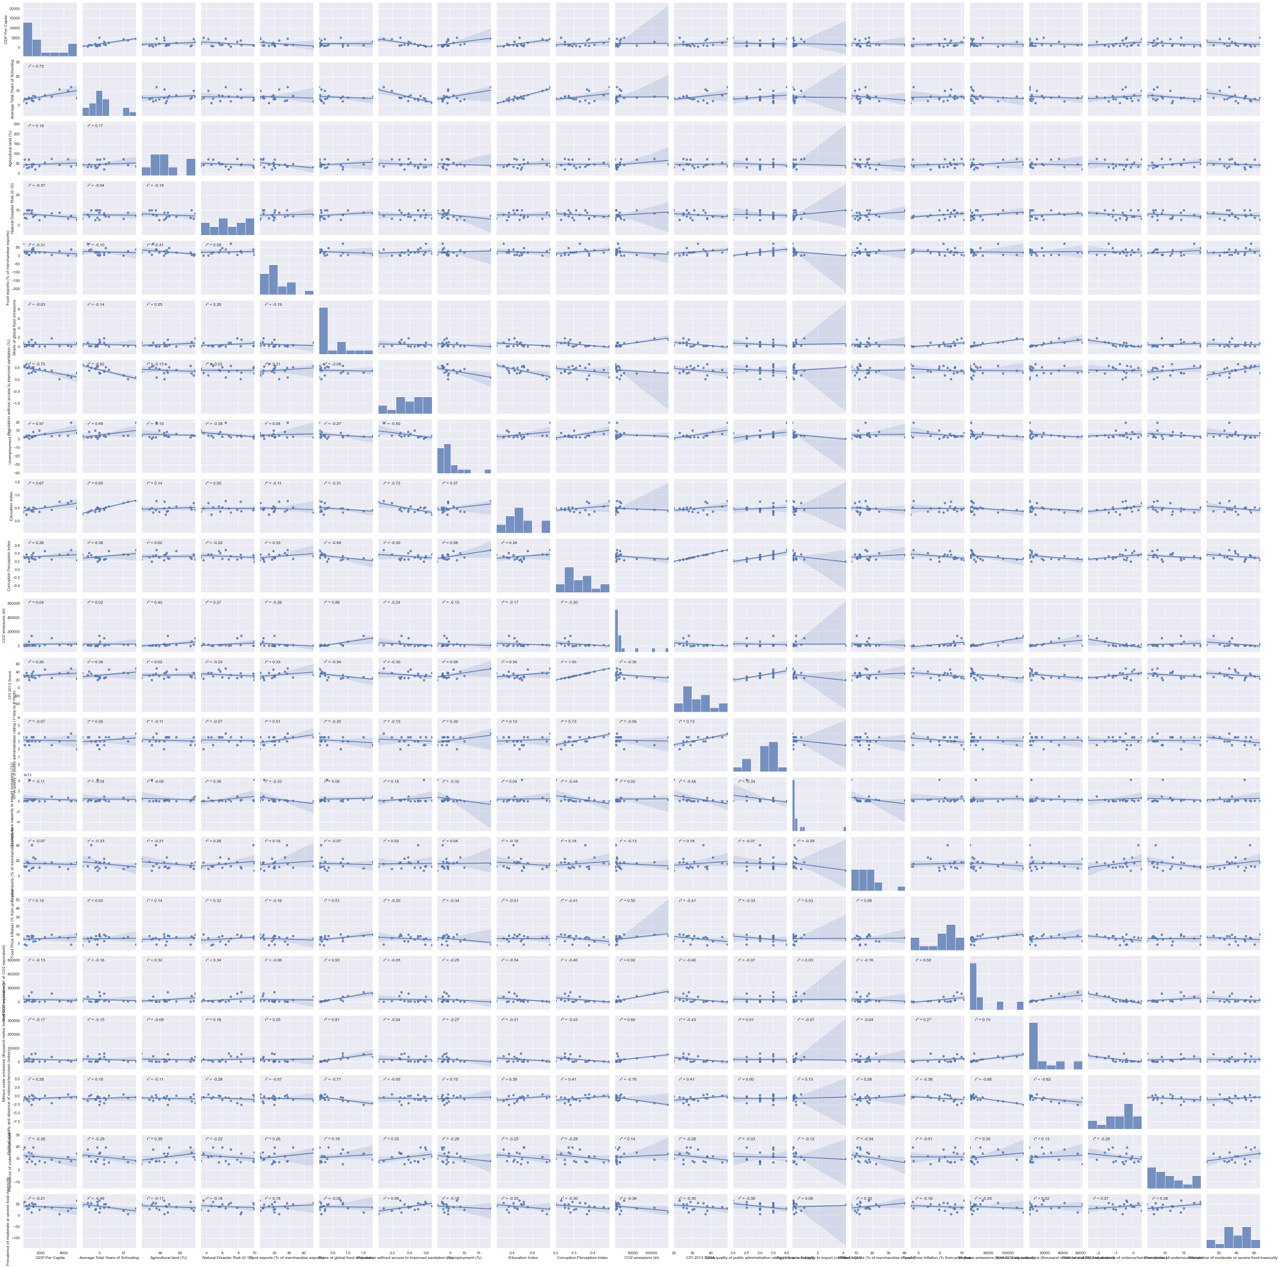

We then obtained the coefficient of determination, R2, for each pairplot. We set the R2 threshold to be 0.1 and removed any features that had R2 values that exceeded the threshold. 

### 4. Target and Features Description

Hence, we arrived at the following three features and one target:

<b>Features:</b><br>
1. <b>Poverty Gap Index at USD 3.65 a day (2017 PPP) (%):</b> It is the mean shortfall in income or consumption from the poverty line USD 3.65 a day (counting the nonpoor as having zero shortfall), expressed as a percentage of the poverty line. This measure reflects the depth of poverty as well as its incidence.<br>
Source: https://data.worldbank.org/indicator/SI.POV.LMIC.GP<br>
<br>
2. <b>Corruption Perception Index (%):</b> It measures how corrupt each country’s public sector is perceived to be, according to experts and businesspeople. This is a percentage value, where the lower the value, the more corrupt the nation.<br>
Source: https://datahub.io/core/corruption-perceptions-index<br>
<br>
3. <b>Primary Energy Consumption (kWh/$):</b> It is the ratio between Primary energy consumption and gross domestic product (GDP), calculated for a calendar year. Primary energy is an energy form found in nature that has not been subjected to any human engineered conversion process, like fossil fuels. This is measured in kWh/\$.<br>
Source: https://ourworldindata.org/search?q=energy+consumption<br>
    

<br>We chose the prevalence of undernourishment as our target because it is an indicator of food insecurity and the data collected on it was appropriately sufficient and from a reliable source.<br>
    
<b>Target:</b><br>
1. <b>Prevalence of Undernourishment (%)</b> is the percentage of the population whose habitual food consumption is insufficient to provide the dietary energy levels that are required to maintain a normal active and healthy life.<br>
Source: https://databank.worldbank.org/source/world-development-indicators/Series/SN.ITK.DEFC.ZS<br>

### 5. Data Visualisation

#### 5.1. Un-Transformed Data Visualisation

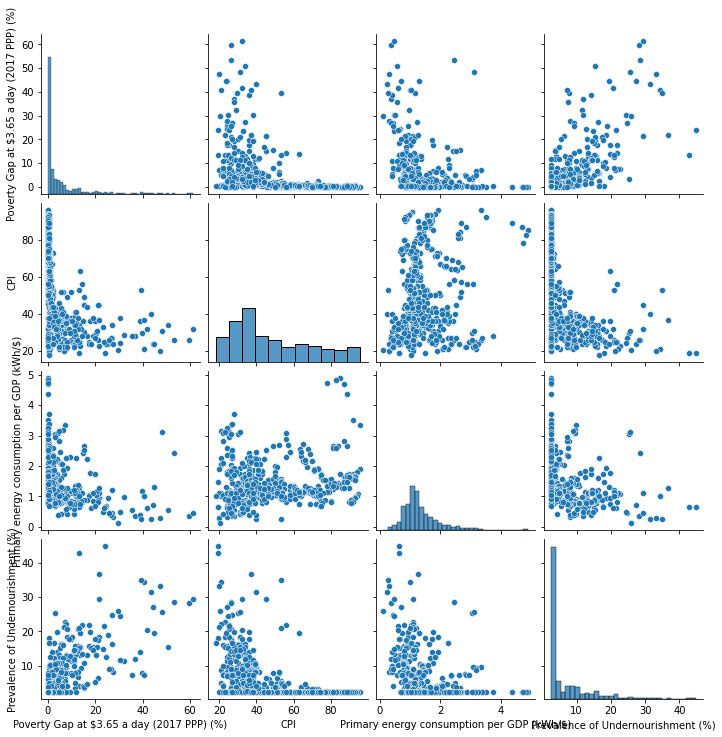

In [372]:
import numpy as np
import pandas as pd
import seaborn as sns

df = pd.read_csv('SC06 Group03 Un-Transformed Data.csv')
df.drop(columns='Unnamed: 0', inplace=True)
df.set_index("Country", inplace=True)
sns.pairplot(df)

#### 5.2. Transformed Data Visualisation

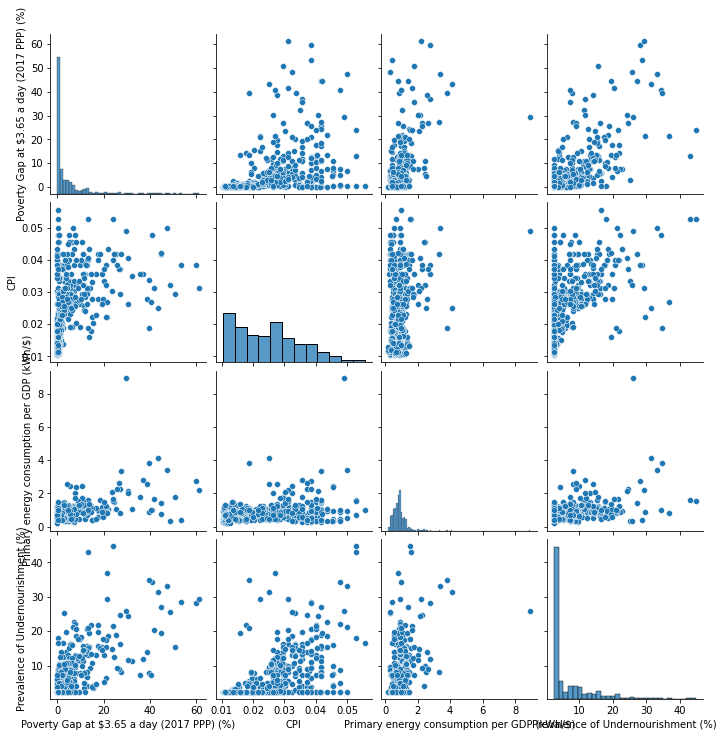

In [373]:
df["Primary energy consumption per GDP (kWh/$)"] = 1/df["Primary energy consumption per GDP (kWh/$)"]
df['CPI'] = 1/ df['CPI']
sns.pairplot(df)

### 6. Data Processing

#### 6.1. Dataset Format to Process
1. The csv file must contain the following column names:<br>
1a.  Entity
> - Contains the country names
>
1b. Code
> - Contains the country name codes
>
1c. Year
> - Contains the year that the data was extracted from
>
1d. Feature of Interest
> - The name of the feature
>
2. If the csv file only contains data from a specific year, use the process_countries function to match the countries in the list of countries.<br>
3. If the csv file contains data from a range of years, use the process_data function to get data from a specific year and to match the countries in the list of countries.

#### 6.2. Defining Data File Paths

In [374]:
import os

## GET THE PATH FOR EACH DATA SET
# /Users/jingting/Desktop/1 SUTD/1.3 Term 3/DTP/
data_path = os.getcwd() + '/Unprocessed Data Sets/'
file_names = [data_path + file_name for file_name in os.listdir(data_path)]

#### 6.3. Getting Dataframes for Each Dataset

In [375]:
df_dict = {}

for file_name in file_names:
    df = pd.read_csv(file_name, index_col = False)
    file_name = os.path.basename(file_name)
    file_name, _ = os.path.splitext(file_name)
    df_dict[file_name] = df

#### 6.4. Defining Countries and Year of Interest

In [376]:
year = 2006
countries = ['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belgium-Luxembourg', 'Belize',
       'Benin', 'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'China, Hong Kong SAR', 'China, Macao SAR', 'China, mainland',
       'China, Taiwan Province of', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba',
       'Cyprus', 'Czechia', 'Czechoslovakia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Ethiopia PDR', 'Faroe Islands', 'Fiji',
       'Finland', 'France', 'French Guyana', 'French Polynesia', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada',
       'Guadeloupe', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana',
       'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran (Islamic Republic of)', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati',
       'Kuwait', 'Kyrgyzstan', "Lao People's Democratic Republic",
       'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Lithuania',
       'Luxembourg', 'Madagascar', 'Malawi', 'Malaysia', 'Mali', 'Malta',
       'Martinique', 'Mauritania', 'Mauritius', 'Mexico',
       'Micronesia (Federated States of)', 'Mongolia', 'Montenegro',
       'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nauru', 'Nepal',
       'Netherlands', 'New Caledonia', 'New Zealand', 'Nicaragua',
       'Niger', 'Nigeria', 'Niue', 'North Macedonia', 'Norway', 'Oman',
       'Pakistan', 'Palestine', 'Panama', 'Papua New Guinea', 'Paraguay',
       'Peru', 'Philippines', 'Poland', 'Portugal', 'Puerto Rico',
       'Qatar', 'Republic of Korea', 'Republic of Moldova', 'Réunion',
       'Romania', 'Russian Federation', 'Rwanda', 'Saint Kitts and Nevis',
       'Saint Lucia', 'Saint Vincent and the Grenadines', 'Samoa',
       'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia',
       'Serbia and Montenegro', 'Seychelles', 'Sierra Leone', 'Singapore',
       'Slovakia', 'Slovenia', 'Solomon Islands', 'Somalia',
       'South Africa', 'South Sudan', 'Spain', 'Sri Lanka', 'Sudan',
       'Sudan (former)', 'Suriname', 'Sweden', 'Switzerland',
       'Syrian Arab Republic', 'Tajikistan', 'Thailand', 'Timor-Leste',
       'Togo', 'Tokelau', 'Tonga', 'Trinidad and Tobago', 'Tunisia',
       'Türkiye', 'Turkmenistan', 'Tuvalu', 'Uganda', 'Ukraine',
       'United Arab Emirates',
       'United Kingdom of Great Britain and Northern Ireland',
       'United Republic of Tanzania', 'United States of America',
       'Uruguay', 'USSR', 'Uzbekistan', 'Vanuatu',
       'Venezuela (Bolivarian Republic of)', 'Viet Nam', 'Yemen',
       'Yugoslav SFR', 'Zambia', 'Zimbabwe']

####  6.5. process_data Function
Used for data sets that have all the years within the same file.
##### What the function does:
1. Takes in a csv file as its argument.
2. Filter data for the specified year of interest.
2. Drop unwanted columns from the dataframe.
3. Compares countries in the data set with the list of countries. 
   Appends a new row for each country not found in the data set with a value of 0.
4. Adds the year of interest to each country. 
5. Returns a new file with all countries from the list with their corresponding data values.

In [377]:
def process_data(file):
    
    ## Filtering by year and countries (does not include countries not in the list)
    print("Original file shape:", file.shape)
    file_year = file.loc[file["Year"] == year]
    print("Original file_2013 shape:", file_year.shape)
    file_year = file_year.query("Entity in @countries")
    print("After matching countries:", file_year.shape)
    
    ## Dropping unwanted columns
    drop_columns = ['Code', 'Year', 'Code.1']
    file_year = file_year.drop(columns = drop_columns)
    
    ## Getting the countries not in my csv file but in the countries list
    countries_in_csv = file_year["Entity"].unique()
#     print("current countries in csv:", countries_in_csv)
    
    ## Get column of interest name
    col = list(file_year.columns)
#     print("Col names:", col)
    col_of_interest = col[1]
    print("Column of interest:", col[1])
    
    ## Add countries not in my csv file as rows in the df
    ## Give them a value of 0
    for country in countries:
        if country not in countries_in_csv:
#             print(country)
            new_row = {"Entity": country, col_of_interest: 0}
            file_year = file_year.append(new_row, ignore_index = True)
        
    # Add "(year)" for each country
    file_year["Entity"] +=  f" ({year})"
    
    return file_year

####  6.6. process_countries Function
Used for data sets that are already split based on the year of interest.

##### What the function does:
1. Takes in a csv file as its argument and a specific year that will be added as a string to each country.
2. Drop unwanted columns from the dataframe.
3. Compares countries in the data set with the list of countries. 
   Appends a new row for each country not found in the data set with a value of 0.
4. Adds the year of interest to each country. 
5. Returns a new file with all countries from the list with their corresponding data values.

In [378]:
def process_countries(file, year1):
    
    file_year = file.query("Entity in @countries")
    print("After matching countries:", file_year.shape)
    
    ## Getting the countries not in my csv file but in the countries list
    countries_in_csv = file_year["Entity"].unique()
#     print("current countries in csv:", countries_in_csv)
    
    ## Get column of interest name
    col = list(file_year.columns)
#     print("Col names:", col)
    col_of_interest = col[1]
    print("Column of interest:", col[1])
    
    ## Add countries not in my csv file as rows in the df
    ## Give them a value of 0
    for country in countries:
        if country not in countries_in_csv:
#             print(country)
            new_row = {"Entity": country, col_of_interest: 0}
            file_year = file_year.append(new_row, ignore_index = True)

        
    ## Add "(year)" for each country
    file_year["Entity"] +=  f" ({year1})"
    
    return file_year

####  6.7. get_percentage Function
Used for data sets that are in units of "number of people".

##### What the function does:
1. Takes in two files, one file contains data of "number of people and the second file contains the total population of each country. Both files should already have the same shape (number of countries and which country).
2. Arranges both files in the same order of countries.
3. Takes the values in column of interest for the first data set and divides it with the column of interest (total population value) of the second data set. The result will be multiplied by 100% to obtain a percentage and the values are assigned to the column of interest of the first file.
4. Returns the file with the percentage values (not the total population file).

In [379]:
def get_percentage(file1, total_pop):
    
    ## Get column of interest name
    col = list(file1.columns)
    col_pop = list(total_pop.columns)
    print("Column names:", col)

    col_of_interest = col[1]
    col_of_interest_pop = col_pop[1]
    print("Column of interest (%):", col_of_interest)
    print("Column of interest_pop (%):", col_of_interest_pop)
    
    ## Making sure the order of the rows is the same for both dataframes
    file1 = file1.sort_values(col_of_interest, ascending = True)
    total_pop = total_pop.sort_values(col_of_interest_pop, ascending = True)
    #print(total_pop)
    
    ## Getting the percentage
    file1[col_of_interest] = (file1[col_of_interest]/total_pop[col_of_interest_pop])/100
    
    return file1

####  6.8. add_datasets_verti Function
Number of arguments taken in can be added or removed depending on the number of files need to be concatenated together.

Used for adding data sets from different years together for a specific feature/target.

##### What the function does:
1. Takes in $n$ number of files to concatenante together.
2. Concatenates the files vertically (adds by rows).
3. Returns the concatenated file.

In [380]:
def add_datasets_verti(file1, file2, file3, file4, file5, file6, file7, file8, file9, file10):
    data_list = [file1, file2, file3, file4, file5, file6, file7, file8, file9, file10]
    file_compiled = pd.concat(data_list, axis = 0)
    return file_compiled

####  6.9. add_datasets_hori Function
Number of arguments taken in can be added or removed depending on the number of files need to be concatenated together.

Used for adding the different features and target into a single csv file. This will be the final and only csv file that will be used to analyse.

##### What the function does:
1. Takes in $n$ number of files to concatenante together (where $n$ is the total number of features and target).
2. Arranges the countries (rows) of each file in the same order.
3. Concatenates the files horizontally (adds the features and target as a new column).
4. Returns the concatenated file.

In [381]:
def add_datasets_hori(file1, file2, file3, file4):
    file1.set_index('Entity', inplace = True)
    file2.set_index('Entity', inplace = True)
    file3.set_index('Entity', inplace = True)
    file4.set_index('Entity', inplace = True)

    
    data_list = [file1, file2, file3, file4]
    file_compiled = pd.concat(data_list, axis = 1)
    
    return file_compiled

#### 6.10. drop_everything Function
##### What the function does:
1. Takes in a file that contains NaN and/or zero values.
2. The function will search the data set for NaN and/or zero values and remove the rows that contain them.
3. Returns the file after removing the necessary rows.

In [382]:
def drop_everything(file):
    # drops zero values
    file = file.loc[~(file == 0).any(axis=1)]
#     print(file)

    ## drops NaN values
    file = file.dropna()
    return file

##### If there are any unwanted columns left in the csv file after concatenation, the .drop() method can be used.
file = file.drop(columns = ['Unnamed: 0', 'Unnamed: 1])

### 7. Preparing our Features and Target

In [383]:
def normalize_z(df):
    return (df - df.mean(axis=0)) / df.std(axis=0)


def get_features_targets(df, feature_names, target_names):
    df_feature = df.loc[:, feature_names]
    df_target = df.loc[:, target_names]
    return df_feature, df_target


def prepare_feature(df_feature):
    feature = df_feature.to_numpy()
    array1 = np.ones((feature.shape[0], 1))
    X = np.concatenate((array1, feature), axis=1)
    return X


def prepare_target(df_target):
    return df_target.to_numpy().reshape((df_target.shape[0], 1))

### 8. Building Our Model

Our model utilises Multiple Linear Regression to predict the Prevalence of Undernourishment as a percentage. 
The model is trained against a Training Set that consists of 55% of our total pool of datasets and it is validated against our Validation Set which represent 15% of the total number of datasets.

Finally, our model is tested against the Test Set with the final 30% of total datasets.

The Adjusted Coefficient of Determination (aR2) and Root Mean Square Error (RMSE) metric is used to determine how accurate our model is after the Validation Set testing and final testing with the Test Set.

In [384]:
def predict(df_feature, beta):
    feature_norm = normalize_z(df_feature)
    X = prepare_feature(feature_norm)
    return np.matmul(X, beta)


def calc_linear(X, beta):
    y = np.matmul(X, beta)
    return y


def split_data(df_feature, df_target, random_state=None, test_size=0.5):
    #assuming index is consitent betweeen features and target
    if random_state != None:
        np.random.seed(random_state)
    test_idx = np.random.choice(len(df_feature),
                               size=int(test_size * len(df_feature)),
                               replace=False)
    df_feature_test = df_feature.loc[df_feature.index[test_idx]]
    df_feature_train = df_feature.drop(df_feature.index[test_idx])
    df_target_test = df_target.loc[df_target.index[test_idx]]
    df_target_train = df_target.drop(df_target.index[test_idx])
    return df_feature_train, df_feature_test, df_target_train, df_target_test


def r2_score(y, ypred):
    npy = y.to_numpy().reshape((y.shape[0],1))
    npypred = ypred.reshape((y.shape[0],1))
    ssres = np.sum((npy - npypred)**2)
    mean = np.mean(npy)
    sstot = np.sum((npy - mean)**2)
    return 1 - (ssres / sstot)


def adjusted_r2(y,ypred, no_features):
    npy = y.to_numpy().reshape((y.shape[0],1))
    npypred = ypred.reshape((y.shape[0],1))
    r2 = r2_score(y, ypred)
    n = npy.shape[0]
    p = no_features
    adjustedr2 = 1- ((1-r2)*(n-1))/(n-p-1)
    return adjustedr2


def mean_squared_error(target, pred):
    n = target.shape[0]
    np_target = target.to_numpy().reshape(target.shape[0], 1)
    error = np_target - pred.reshape(pred.shape[0],1)
    mse = (1 / n) * np.matmul(error.T, error)[0][0]
    return mse


def normalised_rmse(target, pred):
    rmse = math.sqrt(mean_squared_error(target,pred))
    maxval = target.max()
    minval = target.min()
    mean = target.mean()
    return rmse/(maxval-minval)


def compute_cost(X, y, beta):
    J = 0
    m = X.shape[0]
    error = calc_linear(X, beta) - y
    error_sq = np.matmul(error.T, error)
    J = (1 / (2 * m)) * (error_sq)
    J = J.flatten()
    J = J[0]
    return J


def gradient_descent(X, y, beta, alpha, num_iters):
    #calculate m from the shape of x or y
    m = X.shape[0]
    J_storage = np.zeros(num_iters)
    #for the number of iterations
    for n in range(num_iters):
        #--> compute the predicted y
        yp = np.matmul(X, beta)
        #--> compute the error
        error = yp - y
        #--> compute the new beta
        beta = beta - (alpha / m) * np.matmul(X.T, error)
        #--> compute J using the new beta and store it
        J_storage[n] = compute_cost(X, y, beta)
    return beta, J_storage

### 9. Evaluating Our Model

We evaluated our model using the aR2 and RMSE values obtained. 

Both the RMSE and aR2 quantifies how well our regression model fits the dataset. The RMSE tells us how well our regression model can predict the value of the prevalence of undernourishment in absolute terms (standard deviation of the prediction errors) while the aR2 tells us how well our model can predict the value of the prevalence of undernourishment in percentage terms.

### 10. Validation Evaluation

In [385]:
df_train = pd.read_csv("SC06 Group03 2D df_train.csv")
df_train.set_index('Country', inplace = True)

# Extract the features and the targets
feature_columns = df_train.columns[:-1]
target_columns = df_train.columns[-1]
df_features_train, df_target_train = get_features_targets(df_train, feature_columns,
                                              target_columns)

df_features_train = normalize_z(df_features_train)

df_features_train, df_features_val, df_target_train, df_target_val = split_data(
    df_features_train, df_target_train, test_size=0.214285, random_state = 10000)


# Change the features and the target to numpy array using the prepare functions
X = prepare_feature(df_features_train)
target = prepare_target(df_target_train)

iterations = 1500
alpha = 0.01
beta = np.zeros((X.shape[1], 1))
# Call the gradient_descent function
beta, J_storage = gradient_descent(X, target, beta, alpha, iterations)

# call the predict() method
pred = predict(df_features_val, beta)

# change target test set to a numpy array
target = prepare_target(df_target_val)

# Calculate r2 score by calling a function
r2 = r2_score(df_target_val, pred)
print(f"r2: {r2}")
mse = mean_squared_error(df_target_val, pred)
print(f"mse: {mse}")
nrmse = normalised_rmse(df_target_val,pred)
print(f"nrmse: {nrmse}")
ar2 = adjusted_r2(df_target_val, pred, len(feature_columns))
print(f"ar2: {ar2}")
rmse = math.sqrt(mse)
print(f"rmse: {rmse}")

r2: 0.7459145898661537
mse: 11.389266949874276
nrmse: 0.1095713896555719
ar2: 0.7358849026240282
rmse: 3.374798801391614


#### 10.1. Validation Result Visualisation

##### 10.1.1. Poverty Gap Index at $3.65 a day (2017 PPP) (%)

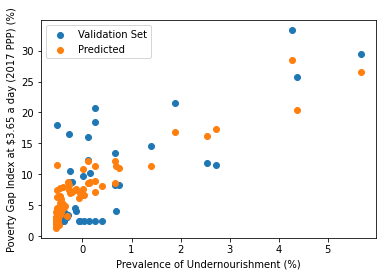

In [386]:
column = df_features_val.columns[0]
plt.scatter(df_features_val[column], df_target_val)
plt.scatter(df_features_val[column], pred)
pred.shape
# print(column)
plt.legend(['Validation Set', 'Predicted'])
plt.ylabel('Poverty Gap Index at $3.65 a day (2017 PPP) (%)')
plt.xlabel('Prevalence of Undernourishment (%)')
plt.show()

##### 10.1.2. Corruption Perception Index (%)

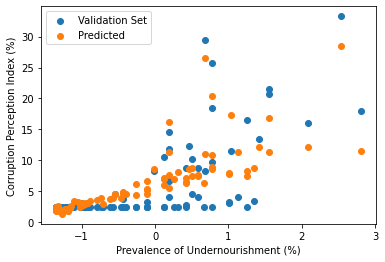

In [387]:
column = df_features_val.columns[1]
plt.scatter(df_features_val[column], df_target_val)
plt.scatter(df_features_val[column], pred)
pred.shape
# print(column)
plt.legend(['Validation Set', 'Predicted'])
plt.ylabel('Corruption Perception Index (%)')
plt.xlabel('Prevalence of Undernourishment (%)')
plt.show()

##### 10.1.3. Primary Energy Consumption per GDP (kWh/$)

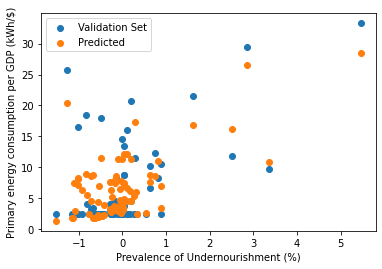

In [388]:
column = df_features_val.columns[2]
plt.scatter(df_features_val[column], df_target_val)
plt.scatter(df_features_val[column], pred)
pred.shape
# print(column)
plt.legend(['Validation Set', 'Predicted'])
plt.ylabel('Primary energy consumption per GDP (kWh/$)')
plt.xlabel('Prevalence of Undernourishment (%)')
plt.show()

### 11. Test Evaluation

In [389]:
df_test = pd.read_csv('SC06 Group03 2D df_test.csv')
df_test.set_index("Country", inplace=True)
# Extract the features and the targets
feature_columns = df_train.columns[:-1]
target_columns = df_train.columns[-1]
df_features_train, df_target_train = get_features_targets(df_train, feature_columns,
                                              target_columns)


df_features_testset, df_target_testset = get_features_targets(df_test, feature_columns,
                                              target_columns)

df_features_testset = normalize_z(df_features_testset)
pred = predict(df_features_testset, beta)
# change target test set to a numpy array
target = prepare_target(df_target_test)

# Calculate r2 score by calling a function
r2 = r2_score(df_target_testset, pred)
print(f"r2: {r2}")
mse = mean_squared_error(df_target_testset, pred)
print(f"mse: {mse}")
nrmse = normalised_rmse(df_target_testset,pred)
print(f"nrmse: {nrmse}")
ar = adjusted_r2(df_target_testset, pred, len(feature_columns))
print(f"ar2: {ar2}")
rmse = math.sqrt(mse)
print(f"rmse: {rmse}")

r2: 0.6739051075661385
mse: 12.38730394074889
nrmse: 0.11033104048214087
ar2: 0.7358849026240282
rmse: 3.5195601913802936


#### 11.1. Test Result Visualisation

##### 11.1.1. Poverty Gap at $3.65 a day (2017 PPP) (%)

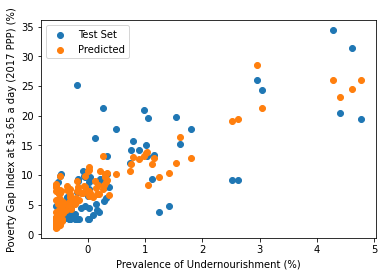

In [390]:
column = df_features_testset.columns[0]
plt.scatter(df_features_testset[column], df_target_testset)
plt.scatter(df_features_testset[column], pred)
pred.shape
# print(column)
plt.legend(['Test Set', 'Predicted'])
plt.ylabel('Poverty Gap Index at $3.65 a day (2017 PPP) (%)')
plt.xlabel('Prevalence of Undernourishment (%)')
plt.show()

##### 11.1.2. Corruption Perception Index (%)

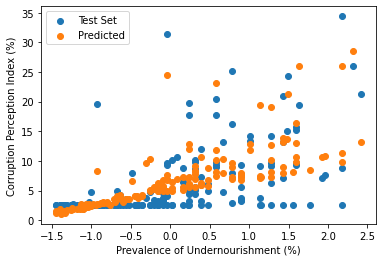

In [391]:
column = df_features_testset.columns[1]
plt.scatter(df_features_testset[column], df_target_testset)
plt.scatter(df_features_testset[column], pred)
pred.shape
# print(column)
plt.legend(['Test Set', 'Predicted'])
plt.ylabel('Corruption Perception Index (%)')
plt.xlabel('Prevalence of Undernourishment (%)')
plt.show()

##### 11.1.3. Primary energy consumption per GDP (kWh/$)

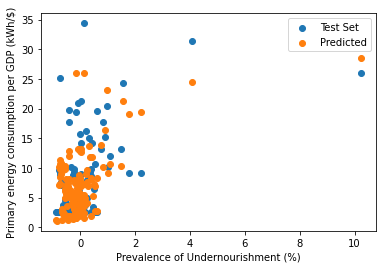

In [392]:
column = df_features_testset.columns[2]
plt.scatter(df_features_testset[column], df_target_testset)
plt.scatter(df_features_testset[column], pred)
pred.shape
# print(column)
plt.legend(['Test Set', 'Predicted'])
plt.ylabel('Primary energy consumption per GDP (kWh/$)')
plt.xlabel('Prevalence of Undernourishment (%)')
plt.show()

### 12. Improving the Model

Initially, we used datasets from years 2011 to 2013 only and obtained 81 data sets. We split the datasets into Training and Test Sets with weightages of 70% and 30% respectively. However, after evaluating our model, we realised that we needed to include a Validation Set to train our data with. The purpose of the Validation Set was to avoid testing our model against the Test Set which could result in overfitting.

Hence, we tried to split our Training Set further into a smaller set of Training Set and Validation Set. However, after evaluating our datasets, we obtained an unsatisfactory aR2. We only had 12 Validation datasets to work with which we theorized were insufficient to train our model with.

To overcome this issue, we tested our theory by collecting data from the years 2006 to 2015 for all the features and the target, and used these datasets to train our model. 

In total, we collected 2090 datasets. These datasets consisted of missing data which we initially considered filling with its mean values. However, we decided that it would affect the accuracy of our final model prediction and hence we removed the rows that had missing data.

We were thus left with 538 datasets which we split into Training Set, Validation Set and Test Set, accounting for 55%, 15% and 30% of the dataset respectively.

#### Below is the result when we trained and tested our data against 81 datasets.

In [393]:
df = pd.read_csv("SC06 Group03 Old Dataset.csv")
df.set_index('Country', inplace = True)

# Extract the features and the targets
feature_columns = df.columns[:-1]
target_columns = df.columns[-1]
df_features_train, df_target_train = get_features_targets(df, feature_columns, target_columns)

df_features_train = normalize_z(df_features_train)

df_features_train, df_features_test, df_target_train, df_target_test = split_data(
    df_features_train, df_target_train, test_size=0.3, random_state = 100)

# Change the features and the target to numpy array using the prepare functions
X = prepare_feature(df_features_train)
target = prepare_target(df_target_train)

iterations = 1500
alpha = 0.01
beta = np.zeros((X.shape[1], 1))
# Call the gradient_descent function
beta, J_storage = gradient_descent(X, target, beta, alpha, iterations)

# call the predict() method
pred = predict(df_features_test, beta)

# change target test set to a numpy array
target = prepare_target(df_target_test)

# Calculate r2 score by calling a function
r2 = r2_score(df_target_test, pred)
print(f"r2: {r2}")
mse = mean_squared_error(df_target_test, pred)
print(f"mse: {mse}")
nrmse = normalised_rmse(df_target_test,pred)
print(f"nrmse: {nrmse}")
ar2 = adjusted_r2(df_target_test, pred, len(feature_columns))
print(f"ar2: {ar2}")
rmse = math.sqrt(mse)
print(f"rmse: {rmse}")

r2: 0.7297148221455338
mse: 4.972327552125311
nrmse: 0.1311689202802723
ar2: 0.6728126794393305
rmse: 2.229871644764629


### 13. Discussion and Analysis
From 2090 to 538 datasets after removing missing data and with three features, we expected to obtain a sufficiently accuracy prediction if there were existing relationships between our features and the target after transforming our features data into a linear relationship with the target.
Despite having sufficient datasets, our aR2 value of 0.736 suggests that our transformed features may not have a very strong linear relationship with our target. Our model can thus only provide a very rough prediction of the target.

An alternative, perhaps better approach would be to consider a model that does not use multi-linear regression. The project scope could also be better defined by narrowing it down to a more specific target.

### 14. Link to Video Submission

https://youtu.be/rGl3npJ00Ks